- Handwritten digit dataset with 28x28 pixels images.

- ANN to predict the digit in the image.

- This is an Multi-class classification problem.

- Since it is multi class, we'll have 10 output neurons (0 to 9 digits).

- We'll use softmax activation function in the output layer.

- Highest probability neuron will be the predicted digit.

- We'll have following:

        - 784 input neurons (28x28 pixels)

        - 1 hidden layer with 128 neurons

        - 10 output neurons

- Weights and biases in each layer:

        - Input to Hidden layer: 784x128 weights and 128 biases

        - Hidden to Output layer: 128x10 weights and 10 biases

These weights and biases may increase or decrease if we add or subtract neurons in the layers.

In [27]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [28]:
(xTrain, yTrain), (xTest, yTest) = keras.datasets.mnist.load_data()

In [29]:
xTrain.shape

(60000, 28, 28)

In [30]:
xTrain[0]               # 1st image with pixel value

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [31]:
xTest.shape

(10000, 28, 28)

In [32]:
yTrain              # label for images of xTest

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

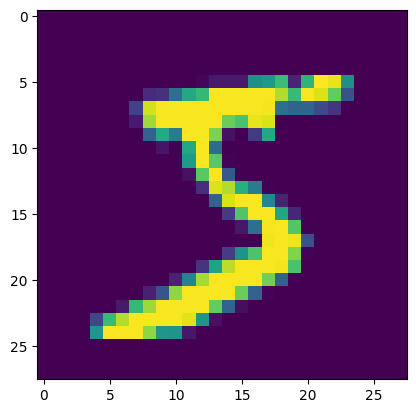

In [33]:
import matplotlib.pyplot as plt              # To view images

plt.imshow(xTrain[0])

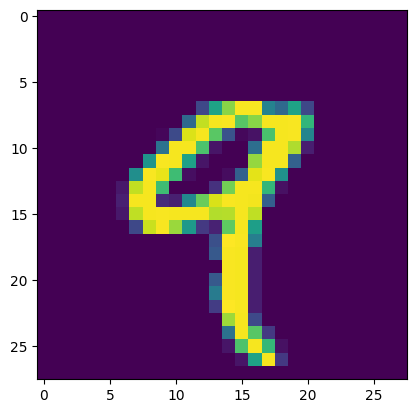

In [34]:
plt.imshow(xTrain[4])

### Changing the values in a similar range i.e. between 0 and 1

In [35]:
xTrain = xTrain/255
xTest = xTest/255

In [36]:
xTrain[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [37]:
model = Sequential()

# First we have to flatten the data (Converting 2d to 1d) because right now we have data in 28x28 format but we'll have 784 input neurons
# For conversion into 1d, we'll use flatten()

model.add(Flatten(input_shape = (28, 28)))          # Input Layer ; Output will be given to dense, hense we don't have to specify input layers
model.add(Dense(128, activation='relu'))            # Hidden Layer
model.add(Dense(10, activation='softmax'))            # Output layer

d:\Deep Learning Notebooks\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

- 784 inputs going into 128 neurons with 128 biases, we'll have 784x128 + 128 = 100480 parameters and so on for next layer.

In [39]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam')

In [40]:
model.fit(xTrain, yTrain, epochs=10, validation_split=.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.4742 - val_loss: 0.1589
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1344 - val_loss: 0.1054
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0852 - val_loss: 0.1011
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0637 - val_loss: 0.0862
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0442 - val_loss: 0.0950
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0363 - val_loss: 0.0925
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0251 - val_loss: 0.0903
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0220 - val_loss: 0.0845
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0157 - val_loss: 0.0970
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0149 - val_loss: 0.0933


In [42]:
model.get_weights()

[array([[ 0.04962262,  0.07059857, -0.07337201, ..., -0.07602224,
          0.05644386,  0.07354695],
        [ 0.04923534,  0.0134302 ,  0.01769576, ..., -0.05114222,
         -0.07111575,  0.04145211],
        [ 0.04069536, -0.06550846, -0.01285496, ..., -0.00804686,
          0.00641444,  0.02762018],
        ...,
        [-0.06223098, -0.08065299, -0.05006456, ..., -0.00978386,
         -0.00761927,  0.04897825],
        [ 0.04998691, -0.03106342,  0.00674561, ...,  0.06046962,
          0.00185845,  0.00206361],
        [ 0.00113514, -0.0253751 , -0.0248022 , ...,  0.00456355,
         -0.07618336,  0.02580541]], dtype=float32),
 array([-4.72004376e-02,  2.70415187e-01,  3.56256403e-02, -6.02970459e-02,
        -1.62460958e-03,  6.68529868e-02,  6.06413186e-02,  9.00057778e-02,
         1.15837231e-01,  4.48405221e-02, -8.84926319e-02, -6.11063950e-02,
        -2.10296654e-04,  9.50098336e-02, -1.04677610e-01,  1.00524388e-01,
        -1.51009811e-02,  5.31350747e-02,  1.73790425e

In [57]:
yProbability = model.predict(xTest)
yProbability            # Gives the probability of each number

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.6416754e-08, 1.0038602e-11, 8.3646677e-07, ..., 9.9999201e-01,
        2.5658277e-08, 3.2083889e-08],
       [4.0074794e-11, 3.0246554e-07, 9.9999964e-01, ..., 5.7073735e-17,
        5.5110753e-08, 4.3798841e-18],
       [3.3071771e-07, 9.9951863e-01, 2.5620770e-05, ..., 4.4961915e-05,
        4.0586456e-04, 1.1173006e-07],
       ...,
       [1.2615692e-15, 2.2961674e-14, 1.4024102e-13, ..., 4.2930495e-09,
        2.6958961e-08, 7.0471145e-07],
       [7.8914211e-16, 8.8623108e-13, 6.6476163e-19, ..., 1.1054392e-11,
        9.8926634e-08, 3.2916270e-10],
       [1.0059040e-14, 6.2981491e-15, 1.4794119e-09, ..., 3.6071392e-19,
        7.8464341e-10, 1.7424800e-15]], dtype=float32)

In [58]:
ypred = yProbability.argmax(axis=1)               # Selecting the number with max prob

In [59]:
from sklearn.metrics import accuracy_score

accuracy_score(yTest, ypred)

0.9777

- We can improve the accuracy with change in architecture

In [60]:
model2 = Sequential()

model2.add(Flatten(input_shape = (28, 28)))          
model2.add(Dense(128, activation='relu'))            
model2.add(Dense(32, activation='relu'))            
model2.add(Dense(10, activation='softmax'))          

d:\Deep Learning Notebooks\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model2.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam')

In [79]:
history = model2.fit(xTrain, yTrain, epochs=25, validation_split=.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.4829 - val_loss: 0.1466
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1285 - val_loss: 0.1017
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0840 - val_loss: 0.1148
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0587 - val_loss: 0.1025
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0466 - val_loss: 0.1157
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0383 - val_loss: 0.0908
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0311 - val_loss: 0.0961
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0235 - val_loss: 0.0892
Epoch 9/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0185 - val_loss: 0.0949
Epoch 10/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0160 - val_loss: 0.1243
Epoch 11/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0196 - val_loss: 0.1033
Epoch 12/25
1500/1500 ━━━━━━━━

In [80]:
yProbability2 = model2.predict(xTest)
yProbability2           

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[7.3108208e-18, 2.3951709e-16, 2.7860371e-15, ..., 1.0000000e+00,
        3.0628478e-18, 4.9639793e-14],
       [1.7782700e-24, 9.8089993e-19, 1.0000000e+00, ..., 6.4421688e-23,
        5.8394690e-17, 6.8699877e-30],
       [1.0633991e-15, 9.9999666e-01, 7.4896276e-09, ..., 3.2907756e-06,
        1.3046187e-09, 2.6016934e-14],
       ...,
       [7.0326579e-24, 1.5354816e-16, 1.7715791e-18, ..., 1.8633840e-12,
        2.1472877e-16, 1.0131038e-13],
       [1.9270256e-26, 1.9932771e-25, 8.6744877e-28, ..., 1.1855072e-21,
        9.8873807e-16, 3.4516543e-30],
       [9.7208063e-24, 3.6594836e-29, 2.3661104e-24, ..., 0.0000000e+00,
        8.7191043e-29, 8.5436058e-31]], dtype=float32)

In [81]:
ypred2 = yProbability2.argmax(axis=1)               # Selecting the number with max prob

In [82]:
accuracy_score(yTest, ypred2)

0.9775

In [83]:
history.history

{'loss': [0.278388112783432,
  0.12057219445705414,
  0.08415745198726654,
  0.06342466175556183,
  0.049282144755125046,
  0.039576511830091476,
  0.03261915594339371,
  0.02701171673834324,
  0.022540850564837456,
  0.01825491525232792,
  0.01969124935567379,
  0.01676766760647297,
  0.014976536855101585,
  0.01202346384525299,
  0.013399159535765648,
  0.011489013209939003,
  0.010141868144273758,
  0.011365857906639576,
  0.010706660337746143,
  0.008149265311658382,
  0.009594575501978397,
  0.011517065577208996,
  0.006317249499261379,
  0.009665470570325851,
  0.006015186198055744],
 'val_loss': [0.146632120013237,
  0.10165625810623169,
  0.11475306004285812,
  0.10247073322534561,
  0.11570043116807938,
  0.09081403911113739,
  0.09607893973588943,
  0.08922158926725388,
  0.09491737186908722,
  0.1242789626121521,
  0.10329968482255936,
  0.12130650132894516,
  0.1146857887506485,
  0.12934920191764832,
  0.10901206731796265,
  0.1285896599292755,
  0.12938162684440613,
  0.1

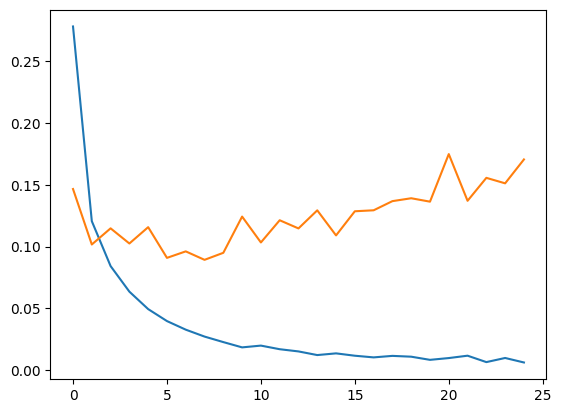

In [85]:
import matplotlib.pyplot as plt 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [87]:
xTest[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

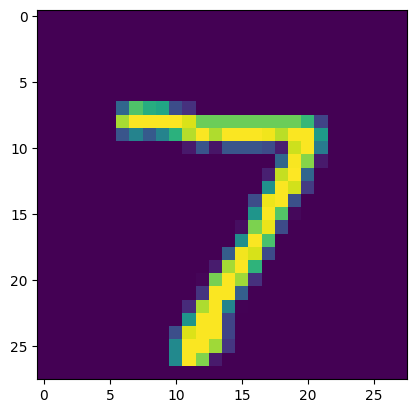

In [88]:
plt.imshow(xTest[0])

In [91]:
model.predict(xTest[0].reshape(1,28,28)).argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


array([7], dtype=int64)

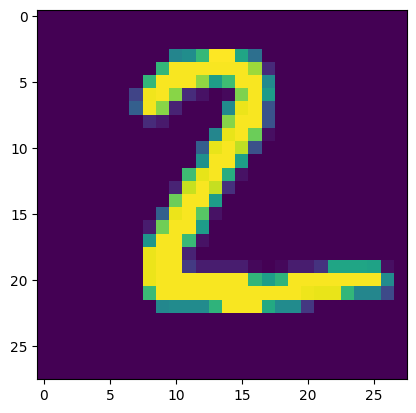

In [93]:
plt.imshow(xTest[1])

In [92]:
model.predict(xTest[1].reshape(1,28,28)).argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([2], dtype=int64)